# GTZAN Genre Collection: Construir un clasificado


El [dataset](http://marsyas.info/downloads/datasets.html) consta de 1000 audios de 30 segundos en formato .wav de 10 géneros musicales distintos.

# Tarea: Construir un clasificador

¿Qué tan bien funciona en validación (10% random de cada género)? 
¿Qué features usar?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import librosa
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_curve

# Analiso la data

Cargo los espectogramas correspondientes a cada cancion como data_set y tomo como label la carpeta a la que pertenece dicha cancion.

Analizando la data observamos que no todas las canciones duran exactamente 30 segundos, eso trae como consecuencia que las señales recibidas (sig) sea ligeramente distinto haciendo que los tiempos cambien para cada cancion.

Para solucionar este problema, truncamos las señales para que considere las correspondiente a 29.9 segundos

In [2]:
from glob import glob

base = "genres/"
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [30]:
len(spectrogram.T.mean(axis=0))

129

In [3]:
data = np.empty((0,129), float)
data_test = np.empty((0,129), float)

labels = []
labels_test = []

max_len_of_songs= int(29.9*22050*2)

for genre in tqdm(genres):
    
    path = base+genre
    songs = sorted(glob(path+"/*.wav"))
    for k, song in enumerate(songs):
        
        sig, rate = librosa.load(song,sr=22050*2)
        frequencies, times, spectrogram = signal.spectrogram(sig[:max_len_of_songs],rate)
        
        if k >= 10:
            data = np.concatenate((data, spectrogram.T), axis=0)
            labels.extend([genre]*spectrogram.T.shape[0])
        else:
            data_test = np.concatenate((data_test, spectrogram.T), axis=0)
            labels_test.extend([genre]*spectrogram.T.shape[0])

  0%|          | 0/9 [00:00<?, ?it/s]

blues


 11%|█         | 1/9 [01:39<13:19, 99.90s/it]

country


 22%|██▏       | 2/9 [03:28<11:56, 102.36s/it]

disco


 33%|███▎      | 3/9 [05:24<10:40, 106.73s/it]

hiphop


 44%|████▍     | 4/9 [07:30<09:22, 112.42s/it]

jazz


 56%|█████▌    | 5/9 [09:44<07:54, 118.74s/it]

metal


 67%|██████▋   | 6/9 [12:08<06:19, 126.58s/it]

pop


 78%|███████▊  | 7/9 [14:42<04:29, 134.62s/it]

reggae


 89%|████████▉ | 8/9 [17:23<02:22, 142.68s/it]

rock


100%|██████████| 9/9 [20:15<00:00, 135.02s/it]


In [ ]:
spectrogram.shape

In [5]:
len(data)

4767660

In [6]:
len(labels)

4767660

In [7]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,7.648128e-09,0.000011,7.110335e-06,5.168256e-05,1.033824e-04,7.953688e-05,7.899648e-06,0.000018,1.508806e-07,1.032856e-06,...,1.486727e-16,2.409925e-16,3.042438e-16,2.883257e-16,2.074110e-16,1.444717e-16,1.147658e-16,1.315939e-16,1.887411e-16,1.106783e-16
1,6.779422e-07,0.000007,1.131812e-05,9.593336e-06,1.620067e-05,2.258443e-05,2.101893e-05,0.000036,1.961122e-06,3.261830e-06,...,7.390746e-17,4.618964e-17,5.232249e-17,7.337561e-17,7.992786e-17,5.935213e-17,4.821689e-17,6.619380e-17,5.433818e-17,2.077265e-17
2,6.092649e-07,0.000002,2.386464e-05,8.191499e-05,1.039179e-04,6.697764e-06,3.674650e-05,0.000012,5.760608e-06,4.978268e-07,...,1.501743e-16,1.566527e-17,1.570348e-16,1.057907e-16,2.870337e-17,8.440343e-17,1.562036e-16,9.452719e-17,2.056155e-17,1.433677e-18
3,6.607849e-06,0.000005,3.207247e-05,1.126581e-04,1.260171e-04,1.286750e-05,3.631045e-05,0.000012,6.068375e-07,5.667600e-07,...,5.023687e-16,2.529030e-16,1.873775e-16,1.161979e-16,3.809910e-17,3.685489e-17,8.497630e-17,1.056475e-16,7.459296e-17,2.148277e-17
4,4.139110e-08,0.000018,8.410859e-06,9.372347e-05,2.437182e-05,3.826040e-06,3.603576e-05,0.000010,9.232585e-07,8.823179e-07,...,2.431432e-16,1.348866e-16,5.883893e-17,3.753518e-17,7.374633e-17,1.006140e-16,6.053369e-17,3.757397e-17,1.742492e-17,1.129188e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767655,2.150557e-07,0.000025,9.224825e-07,9.016479e-07,9.774294e-07,1.981782e-07,8.145278e-07,0.000002,3.009727e-07,5.248008e-07,...,9.288774e-17,3.525058e-17,4.403969e-18,1.433677e-17,1.830306e-17,3.583446e-18,2.831549e-18,1.546853e-17,1.494246e-17,4.270074e-18
4767656,9.883045e-09,0.000005,1.443635e-06,1.106915e-06,2.073079e-06,1.256665e-07,4.955935e-07,0.000001,5.089905e-07,8.667242e-08,...,2.842575e-17,1.778296e-17,3.097286e-18,1.118298e-17,1.913999e-17,8.943883e-18,5.376661e-18,8.960853e-18,6.492572e-18,6.269539e-19
4767657,4.105276e-07,0.000006,3.394618e-07,3.010281e-06,1.872148e-06,2.361454e-07,3.693488e-07,0.000002,5.174419e-07,4.809487e-07,...,1.251614e-17,2.284223e-18,1.298384e-17,3.254790e-17,3.254213e-17,2.353557e-17,2.300149e-17,1.947193e-17,8.727377e-18,6.896119e-19
4767658,2.104916e-08,0.000014,1.311094e-06,3.133642e-06,2.272477e-06,1.568947e-07,6.212122e-07,0.000002,2.408564e-07,7.260729e-07,...,1.267381e-18,2.786364e-17,6.129770e-17,5.101044e-17,2.503433e-17,1.891976e-17,2.854403e-17,2.697282e-17,9.404681e-18,8.503831e-19


In [8]:
# Verifico que la matriz no tenga valores nulos
pd.DataFrame(data).isna().sum(axis=1)

0          0
1          0
2          0
3          0
4          0
          ..
4767655    0
4767656    0
4767657    0
4767658    0
4767659    0
Length: 4767660, dtype: int64

In [9]:
pd.DataFrame(labels)

,0
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
4767655,rock
4767656,rock
4767657,rock
4767658,rock


# Me armo los database



## Separo la data de entrenamiento y la de test

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( data, labels, test_size=0.1, random_state=42 )

## Aplico Scalling al dataset

In [11]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Propongo el baseline

Usaremos como baseline RandomForestClasification.

Este modelo tiene como ventaja que puede clasificar directamente entre un grupo de multiples clases.

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42,  n_jobs=-1, verbose=2, n_estimators=64, criterion="entropy")
forest_clf = RandomForestClassifier(random_state=123,  n_jobs=-1, verbose=0, n_estimators=1024, criterion="entropy", max_depth=32, min_samples_leaf=0.01, max_features = 0.2)

In [13]:
forest_clf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 64
building tree 2 of 64
building tree 3 of 64
building tree 4 of 64building tree 5 of 64

building tree 6 of 64
building tree 7 of 64
building tree 8 of 64
building tree 9 of 64
building tree 10 of 64
building tree 11 of 64
building tree 12 of 64
building tree 13 of 64
building tree 14 of 64
building tree 15 of 64
building tree 16 of 64
building tree 17 of 64
building tree 18 of 64
building tree 19 of 64
building tree 20 of 64
building tree 21 of 64
building tree 22 of 64
building tree 23 of 64
building tree 24 of 64
building tree 25 of 64
building tree 26 of 64
building tree 27 of 64
building tree 28 of 64
building tree 29 of 64
building tree 30 of 64
building tree 31 of 64
building tree 32 of 64
building tree 33 of 64
building tree 34 of 64


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 14.1min


building tree 35 of 64
building tree 36 of 64
building tree 37 of 64
building tree 38 of 64
building tree 39 of 64
building tree 40 of 64
building tree 41 of 64
building tree 42 of 64
building tree 43 of 64
building tree 44 of 64
building tree 45 of 64
building tree 46 of 64
building tree 47 of 64
building tree 48 of 64
building tree 49 of 64
building tree 50 of 64
building tree 51 of 64
building tree 52 of 64
building tree 53 of 64
building tree 54 of 64
building tree 55 of 64
building tree 56 of 64
building tree 57 of 64
building tree 58 of 64
building tree 59 of 64
building tree 60 of 64
building tree 61 of 64
building tree 62 of 64
building tree 63 of 64
building tree 64 of 64


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed: 29.2min finished


RandomForestClassifier(criterion='entropy', n_estimators=64, n_jobs=-1,
                       random_state=42, verbose=2)

# Metricas

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score
#roc_auc_score(np.array(y_train), forest_clf.predict(x_train))
print("Exactitud en set de entrenamiento: ", accuracy_score(forest_clf.predict(x_train), y_train)*100)
print("Exactitud en set de validación: ", accuracy_score(forest_clf.predict(x_val), y_val)*100)
print("Exactitud en set de prueba: ", accuracy_score(forest_clf.predict(data_test), labels_test)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    7.2s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:   14.9s finished


Exactitud en set de entrenamiento:  15.686637796226147


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:    1.7s finished


Exactitud en set de validación:  13.70630456030841


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:    1.8s finished


Exactitud en set de prueba:  11.884886925661647


/home/paredesj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    7.2s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:   15.0s finished


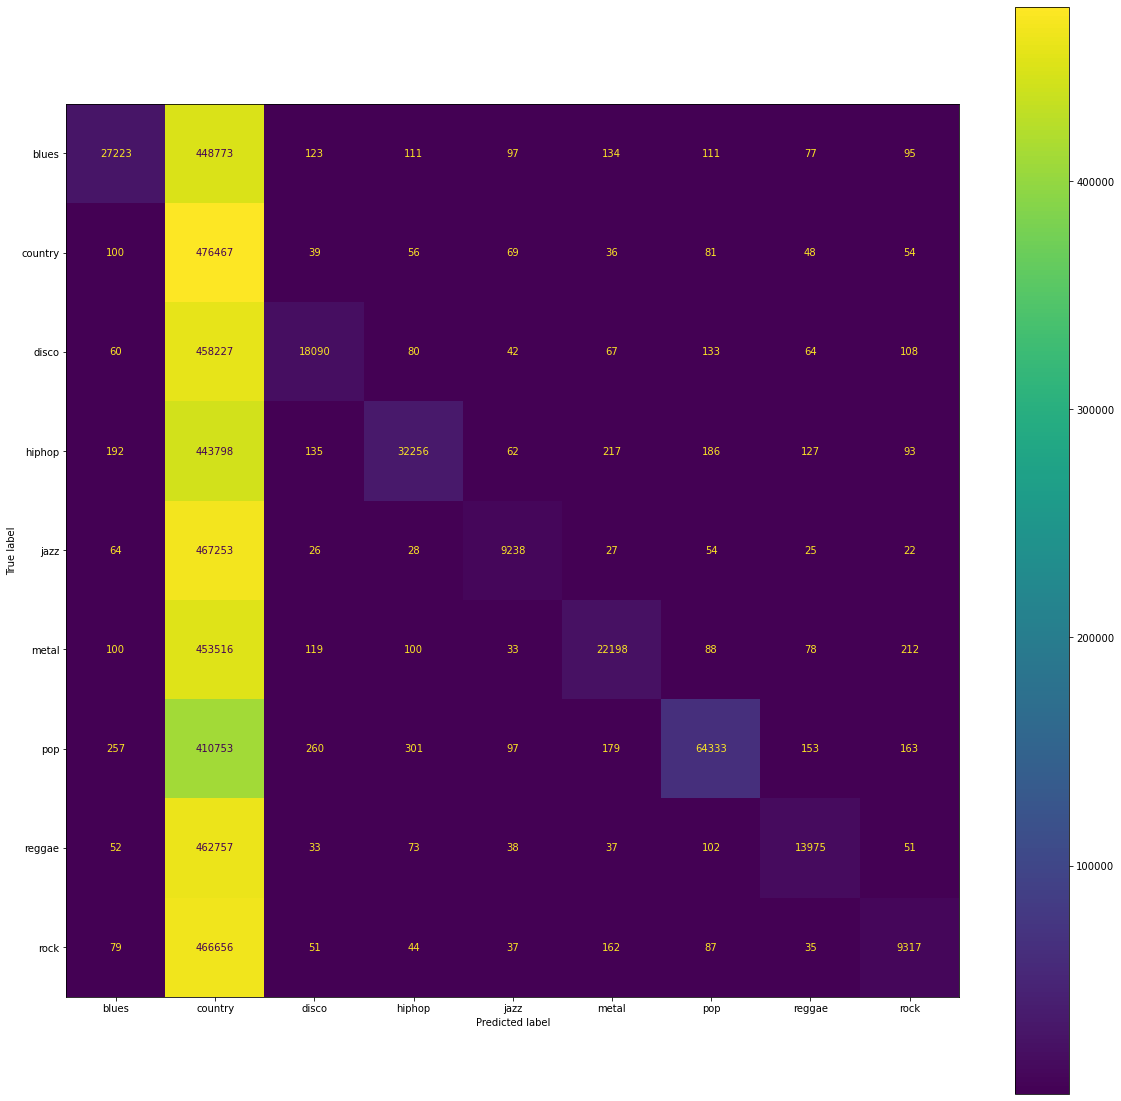

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(forest_clf, x_train, y_train, ax=ax)

/home/paredesj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:    1.7s finished


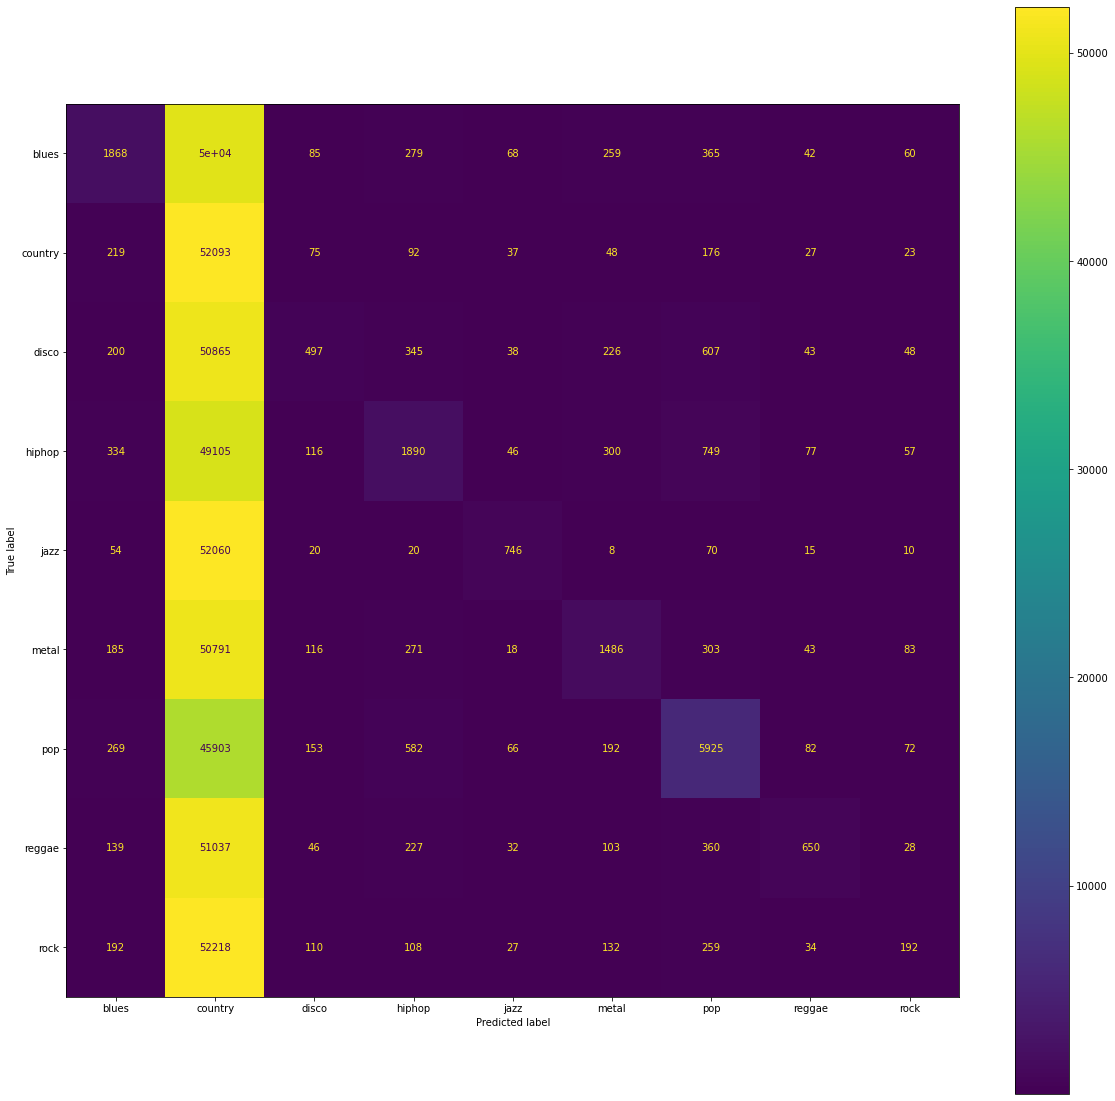

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(forest_clf, x_val, y_val, ax=ax)

/home/paredesj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:    1.9s finished


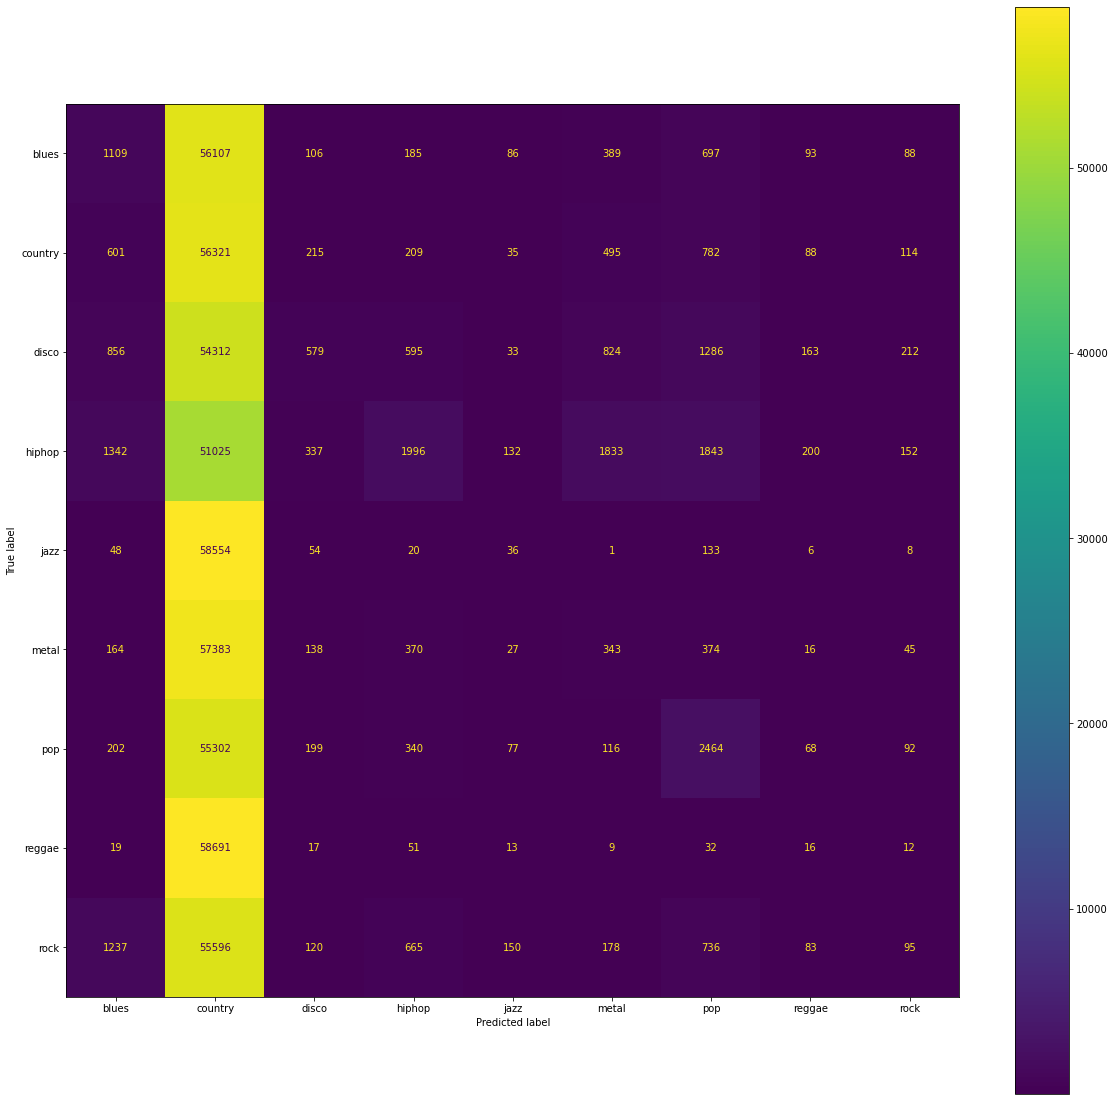

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(forest_clf, data_test, labels_test, ax=ax)